In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
print(cv2.__version__)

4.8.1


In [23]:
def get_image_paths(root_folder, image_extensions=('.jpg', '.jpeg', '.png')):
    image_paths = []
    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith(image_extensions):
                image_paths.append(os.path.join(foldername, filename))
    return image_paths

# Specify the root folder
root_folder = 'data'

# Get image paths
image_paths = get_image_paths(root_folder)

In [24]:
def process_images(image_paths):
    for image_path in image_paths:
        # Read the image
        gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if gray_image.shape != (64, 64):
            # Apply blur
            blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

            # Resize to 64x64
            resized_image = cv2.resize(blurred_image, (64, 64))

            # Overwrite the image
            cv2.imwrite(image_path, resized_image)

process_images(image_paths)

1


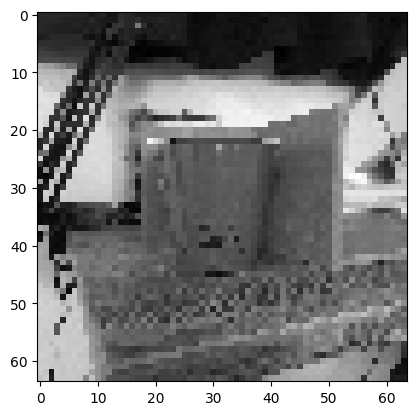

(30, 64, 64)
[[0.16078431 0.15686275 0.15294118 ... 0.0627451  0.06666667 0.06666667]
 [0.14901961 0.15686275 0.15686275 ... 0.03921569 0.05098039 0.05882353]
 [0.14901961 0.14509804 0.1372549  ... 0.06666667 0.04705882 0.08627451]
 ...
 [0.7254902  0.7254902  0.70588235 ... 0.41960784 0.07843137 0.07058824]
 [0.72156863 0.69411765 0.09411765 ... 0.09803922 0.07058824 0.08235294]
 [0.68235294 0.72156863 0.12941176 ... 0.10196078 0.12156863 0.11764706]]


In [25]:
X = np.array(list(map(lambda path: cv2.imread(path, cv2.IMREAD_GRAYSCALE), image_paths)))
X = X / 255.0
Y = np.array([1 if 'cup' in path else 0 for path in image_paths])

display = 3
print(Y[display])
plt.imshow(X[display], cmap='gray')
plt.show()
print(X.shape)
print(X[display])

In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with less verbosity
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1/1 - 1s - loss: 0.6990 - accuracy: 0.4583 - val_loss: 0.6701 - val_accuracy: 0.5000 - 558ms/epoch - 558ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6579 - accuracy: 0.5833 - val_loss: 0.6152 - val_accuracy: 0.6667 - 57ms/epoch - 57ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6066 - accuracy: 0.7083 - val_loss: 0.5469 - val_accuracy: 1.0000 - 59ms/epoch - 59ms/step
Epoch 4/10
1/1 - 0s - loss: 0.5085 - accuracy: 0.8333 - val_loss: 0.4724 - val_accuracy: 1.0000 - 59ms/epoch - 59ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6167 - accuracy: 0.6250 - val_loss: 0.4420 - val_accuracy: 0.8333 - 58ms/epoch - 58ms/step
Epoch 6/10
1/1 - 0s - loss: 0.5055 - accuracy: 0.7917 - val_loss: 0.3696 - val_accuracy: 1.0000 - 59ms/epoch - 59ms/step
Epoch 7/10
1/1 - 0s - loss: 0.5009 - accuracy: 0.7500 - val_loss: 0.3427 - val_accuracy: 0.8333 - 59ms/epoch - 59ms/step
Epoch 8/10
1/1 - 0s - loss: 0.5286 - accuracy: 0.7917 - val_loss: 0.3028 - val_accuracy: 1.0000 - 59ms/epoch - 59ms/step
Epoch 9/10
1/1 - 0s - loss: 0.

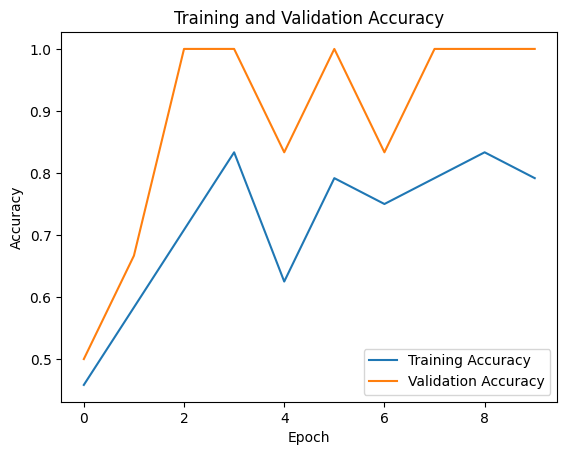

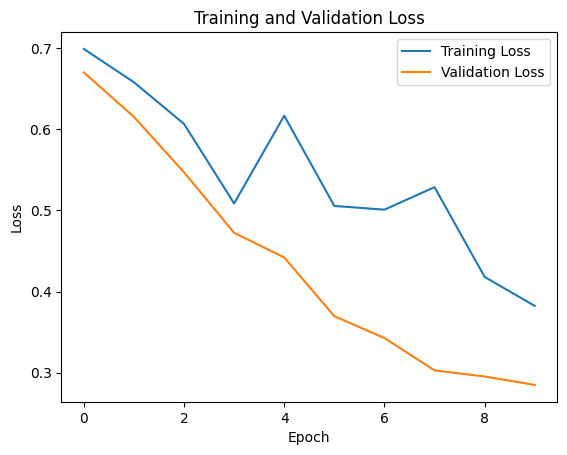

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Save the trained model
model.save('model.h5')